## Detecção de Outliers

 - O que são Quantis e Quartis
 - Como calcular os Limites Inferior e Superior
 - Outliers - o que são e como detectar
 - Como tratar outliers?

## Quantis e Quartis

 Quantis são pontos estabelecidos em uma amostra em intervalos
 regulares que dividem esta amostra em subconjuntos.
 A maneira mais usual de utilizar este conceito, é estabelecendo 3
 pontos ao longo da sua amostra. Isso dividirá a amostra em 4 partes
 Como a amostra foi dividida em 4, chamamos cada ponto destes 3 de
 quartil.

 Ordenando a amostra em ordem crescente:
 - 75% dos dados estão abaixo do 1º quartil
 - 50% dos dados estão abaixo do 1º quartil
 - 25% dos dados estão abaixo do 1º quartil

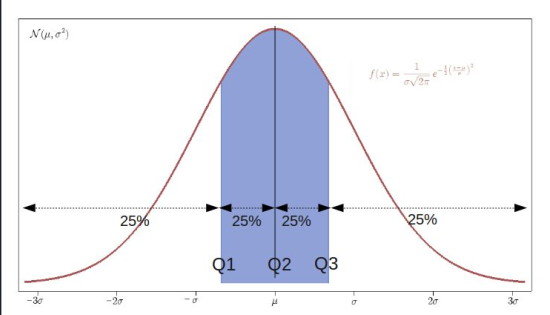

In [22]:
Image('outliers_img.png')

#### Calculo dos limites inferior e superior

Estes limites nos permitem entender quais são os extremos que melhor descrevem aquele grupo de dados, ou seja, se temos pontos
fora destes limites eles podem estar discrepantes.

O cálculo dos limites é feito da seguinte fórmula:
    
    LI = Q1 - 1,5 * IQ
    
    LS = Q3 + 1,5 * IQ
    
    Onde:
    Q1 = Valor do 1º quartil
    Q3 = Valor do 3º quartil
    IQ = Distância Interquartil = Q3 - Q1

### Outliers - o que são e como detectar

Outliers são pontos de dados que possuem valor não condizente com a
amostra da qual fazem parte.

### Como saber se um ponto é um outlier?
 - Usamos justamente os limites inferior e superior para veriﬁcação.
 - Outliers são pontos acima do limite superior, ou abaixo do limite inferior.

### Importando as Bibliotecas

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display       import Image

### Importando o Dataset

In [3]:
df = pd.read_csv('listings.csv', usecols = ['room_type', 'price'])

In [4]:
df.head()

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55


In [5]:
df

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55
...,...,...
5592,Entire home/apt,128
5593,Entire home/apt,100
5594,Entire home/apt,400
5595,Entire home/apt,60


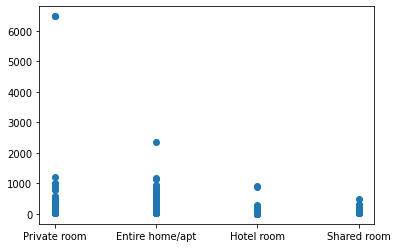

In [6]:
plt.scatter(df.room_type, df.price)
plt.show()

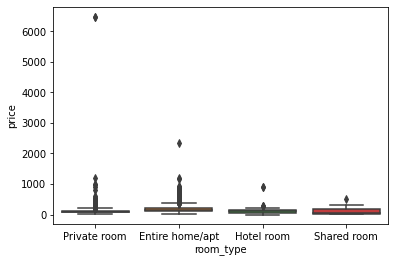

In [7]:
sns.boxplot(y = 'price', x = 'room_type', data = df)
plt.show()

In [8]:
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQ = Q3 - Q1
    LI = df < (Q1 - 1.5*IQ)
    LS = df > (Q3 + 1.5*IQ)
    
    df_final = df[~(LI | LS)]
    return df_final

In [9]:
df_removido = remove_outlier(df.price)
df_removido = pd.DataFrame(df_removido)

In [10]:
df_removido

,price
0,59
1,106
2,135
3,75
4,55
...,...
5591,52
5592,128
5593,100
5595,60


In [11]:
ind_dif = df.index.difference(df_removido.index)

In [12]:
ind_dif

Int64Index([  38,   44,   52,   60,   86,  106,  113,  124,  148,  149,
            ...
            5423, 5430, 5431, 5432, 5460, 5489, 5511, 5515, 5516, 5594],
           dtype='int64', length=259)

### Substituir os Outliers pela Média da Coluna 'Price'

In [13]:
media_price = df.price.mean()
print(media_price)

163.92871180989815


In [14]:
for i in range(0, len(ind_dif), 1):
    df.loc[ind_dif[i], 'price'] = media_price

In [15]:
ind_dif[0]

38

In [17]:
df.head(39)

,room_type,price
0,Private room,59.000000
1,Private room,106.000000
2,Private room,135.000000
3,Private room,75.000000
4,Private room,55.000000
5,Entire home/apt,240.000000
6,Entire home/apt,160.000000
7,Entire home/apt,250.000000
8,Private room,118.000000
9,Entire home/apt,222.000000


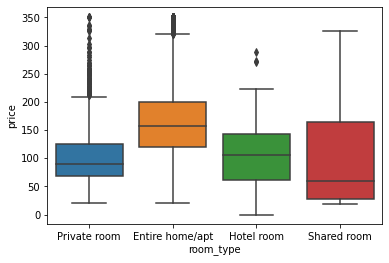

In [18]:
sns.boxplot(y = 'price', x = 'room_type', data = df)
plt.show()

# Tratando outliers

 - Outliers fazem parte da amostra coletada. Diferentemente de pontos nulos ou duplicados que são
 claramente erros, os outliers podem ser pontos reais e corretos, porém muito diferentes dos demais.

 - Como seus valores são muito diferentes, é comum que eles interﬁram na análise, distorcendo
 medidas como a média por exemplo.

 - Naturalmente isso também irá interferir em resultados de modelos estatísticos e de machine
 learning. Portanto é importante estar ciente de como tratar estes pontos.

 - Se temos poucos outliers em uma amostra, é inofensivo removê-los.

 - Caso eles sejam muitos, e sua perda for representar uma baixa signiﬁcativa dos dados, é importante
 tratá-los de outra forma.

 - Uma forma muito comum de tratar outliers, é segmentá-los e fazer análises ou modelos especiﬁcamente para os   outliers, de forma separada do restante dos dados.

In [26]:
df = pd.read_csv('listings.csv', usecols = ['room_type', 'price'])

In [27]:
df.head()

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55


In [28]:
df

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55
...,...,...
5592,Entire home/apt,128
5593,Entire home/apt,100
5594,Entire home/apt,400
5595,Entire home/apt,60


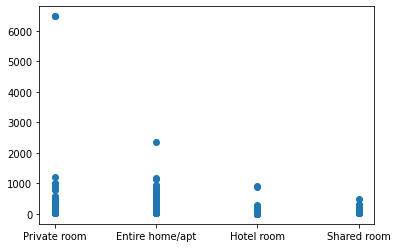

In [29]:
plt.scatter(df.room_type, df.price)
plt.show()

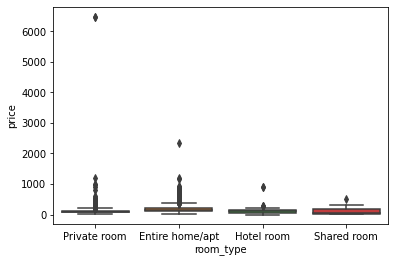

In [30]:
sns.boxplot(y = 'price', x = 'room_type', data = df)
plt.show()

In [31]:
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQ = Q3 - Q1
    LI = df < (Q1 - 1.5*IQ)
    LS = df > (Q3 + 1.5*IQ)
    
    df_final = df[~(LI | LS)]
    return df_final

In [32]:
df_removido = remove_outlier(df.price)
df_removido = pd.DataFrame(df_removido)

In [34]:
ind_dif = df.index.difference(df_removido.index)

In [35]:
ind_dif

Int64Index([  38,   44,   52,   60,   86,  106,  113,  124,  148,  149,
            ...
            5423, 5430, 5431, 5432, 5460, 5489, 5511, 5515, 5516, 5594],
           dtype='int64', length=259)

In [36]:
for i in range(0, len(ind_dif), 1):
    df_final = df.drop([ind_dif[i]])
    df = df_final

In [37]:
df_final

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55
...,...,...
5591,Entire home/apt,52
5592,Entire home/apt,128
5593,Entire home/apt,100
5595,Entire home/apt,60


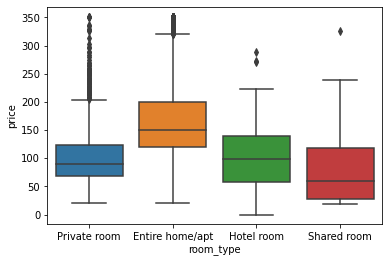

In [38]:
sns.boxplot(y = 'price', x = 'room_type', data = df)
plt.show()